## Machine learning model to perform stock forecasting

### Import the data 

In [3]:
# importing necessary modules
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

For getting the Yahoo finance data I first install the yfinance using 'pip install Yyfinance'

In [4]:
df = yf.download('MU',start="2014-01-01", end=dt.date.today())
df= pd.DataFrame(df)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,21.410000,21.930000,21.379999,21.750000,21.750000,25122400
2014-01-02,21.680000,21.790001,21.270000,21.660000,21.660000,26413500
2014-01-03,21.200001,21.430000,20.900000,20.969999,20.969999,34590200
2014-01-06,20.969999,20.969999,20.639999,20.670000,20.670000,38180500
2014-01-07,20.889999,21.940001,20.889999,21.730000,21.730000,67904500


### Looking at the data
- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?

In [6]:
# look at data
display(df.head())

# look a shape of data
display(df.shape)

# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].dtypes)

# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

# display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,21.410000,21.930000,21.379999,21.750000,21.750000,25122400
2014-01-02,21.680000,21.790001,21.270000,21.660000,21.660000,26413500
2014-01-03,21.200001,21.430000,20.900000,20.969999,20.969999,34590200
2014-01-06,20.969999,20.969999,20.639999,20.670000,20.670000,38180500
2014-01-07,20.889999,21.940001,20.889999,21.730000,21.730000,67904500


(1619, 6)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
dtype: object

Open         False
High         False
Low          False
Close        False
Adj Close    False
dtype: bool

,Open,High,Low,Close,Adj Close,Volume
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1.619000e+03
mean,32.528246,33.069555,31.953304,32.508091,32.508091,3.016754e+07
std,13.278359,13.491559,13.039354,13.270751,13.270751,1.503938e+07
min,9.610000,9.690000,9.310000,9.560000,9.560000,4.672900e+06
25%,22.550000,22.860000,22.224999,22.480000,22.480000,2.065445e+07
50%,31.900000,32.240002,31.400000,31.820000,31.820000,2.663550e+07
75%,43.235001,43.855000,42.480000,43.209999,43.209999,3.524870e+07
85%,47.092001,48.012999,46.313001,47.134000,47.134000,4.192928e+07
95%,55.001000,55.537999,53.782000,54.731001,54.731001,5.902285e+07
99%,60.094599,60.679199,58.790999,59.438199,59.438199,8.494080e+07


In [ ]:
### Creating features /predictor variables (Type I of technical indicator)
I created more features of Type I category of features from the paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4873195/
- Stochastic %K (Stok)
- Stochastic %D (StoD)

In [52]:
# Stochastic %K : (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100
CurrentClose = df['Close']
LowestLow = df['Low'].rolling(window=14).min()
HighestHigh = df['High'].rolling(window=14).max()
df['StoK'] = ((CurrentClose - LowestLow) / (HighestHigh - LowestLow))*100



# Stochastic %D : 3-day simple moving average of %K or pd.rolling_mean(StoK, 3)
StoD = df['StoK'].rolling(window=3).mean()
df['StoD']= StoD

In [66]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,StoK,StoD
Date,,,,,,,,
2013-12-31,21.41,21.93,21.38,21.75,21.75,25122400,NaN,NaN
2014-01-02,21.68,21.79,21.27,21.66,21.66,26413500,NaN,NaN
2014-01-03,21.20,21.43,20.90,20.97,20.97,34590200,NaN,NaN
2014-01-06,20.97,20.97,20.64,20.67,20.67,38180500,NaN,NaN
2014-01-07,20.89,21.94,20.89,21.73,21.73,67904500,NaN,NaN


In [55]:
# vizualizing the price and features (StoK, StoD)

<IPython.core.display.Javascript object>


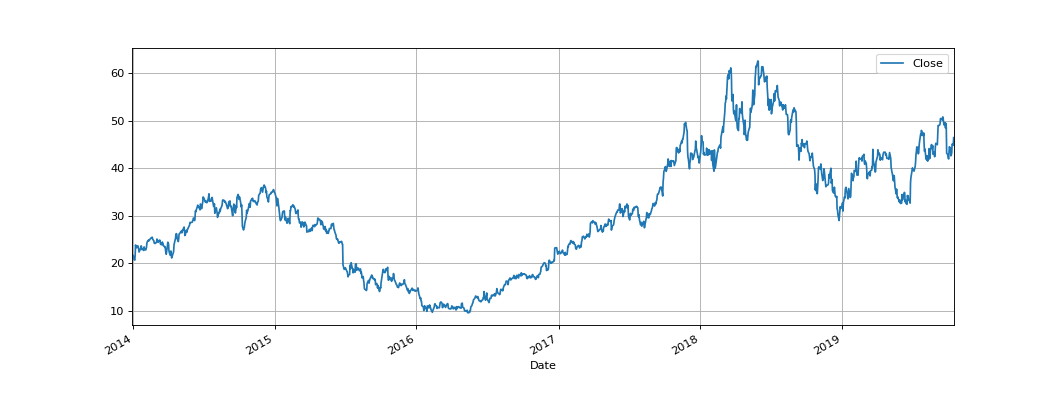

<IPython.core.display.Javascript object>


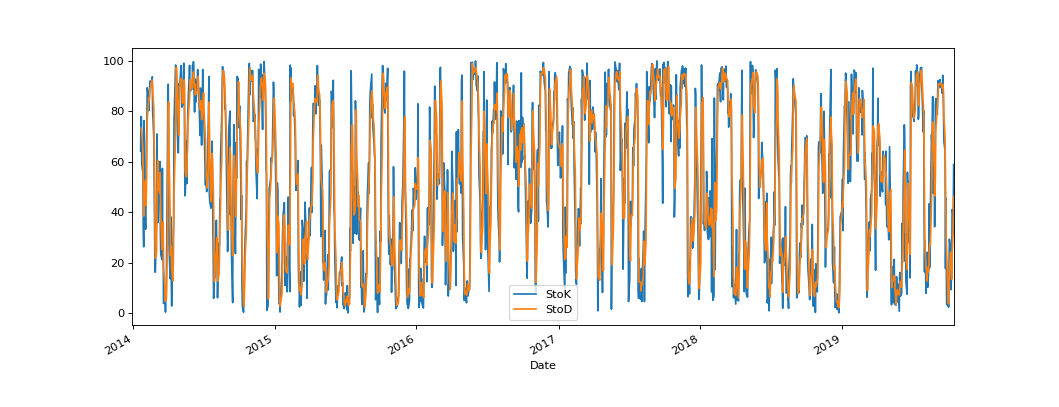

In [57]:
df.plot(y=['Close'],grid=True, figsize=(13,5))
df.plot(y= ['StoK', 'StoD'], figsize=(13,5))

### Defining target variable
I defined the target variable as 'label' by applying 1- day ahead of Close price

In [69]:
# creating a label 1-day ahead on feature data
df['label']= df.StoK.shift(-1)

In [70]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,StoK,StoD,label
Date,,,,,,,,,
2013-12-31,21.41,21.93,21.38,21.75,21.75,25122400,NaN,NaN,NaN
2014-01-02,21.68,21.79,21.27,21.66,21.66,26413500,NaN,NaN,NaN
2014-01-03,21.20,21.43,20.90,20.97,20.97,34590200,NaN,NaN,NaN
2014-01-06,20.97,20.97,20.64,20.67,20.67,38180500,NaN,NaN,NaN
2014-01-07,20.89,21.94,20.89,21.73,21.73,67904500,NaN,NaN,NaN


In [71]:
# turning data set into array
X = np.array(df.dropna()[['StoK']])
X1 = np.array(df.dropna()[['StoK','StoD']])
y = np.array(df.dropna()[['label']])

### Split the data into train and test dataset

In [73]:
# spliting data into train and test data (cross validation)
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


### Create the regression model

In [74]:
# creating the linear model 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression,ElasticNetCV, Ridge
lm = ElasticNetCV()
model = lm.fit(X_train, y_train.reshape(len(y_train)))

C:\Users\L1308\.conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [76]:
predictions = lm.predict(X_test)

In [77]:
# interpreting the coefficient and intercept
print(lm.coef_)
print(lm.intercept_)

[0.84846285]
0.0005402342864990368


In [78]:
# predicting the score (% of accuracy)
print('Train score:', lm.score(X_train, y_train))
print('Test score:', lm.score(X_test, y_test))

Train score: 0.7220054644788502
Test score: 0.7185940740698611


### Vizualizing the model

<IPython.core.display.Javascript object>


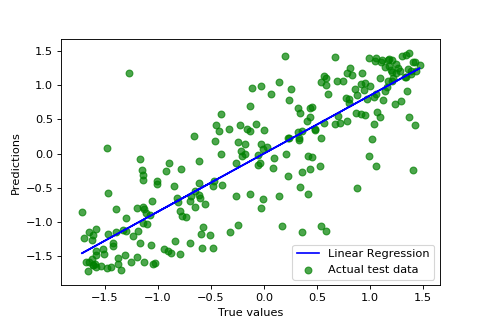

In [79]:
# plot prediction line against the actual test data or vizualizing the predictoin 
%matplotlib notebook
plt.plot(X_test, predictions, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual test data', color='g', alpha=.7)

#other way to write code
#plt.plot(X_test, y_test,  '.', 
         #X_test, predictions, '-', linewidth=2 )

plt.xlabel("True values")
plt.ylabel("Predictions")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


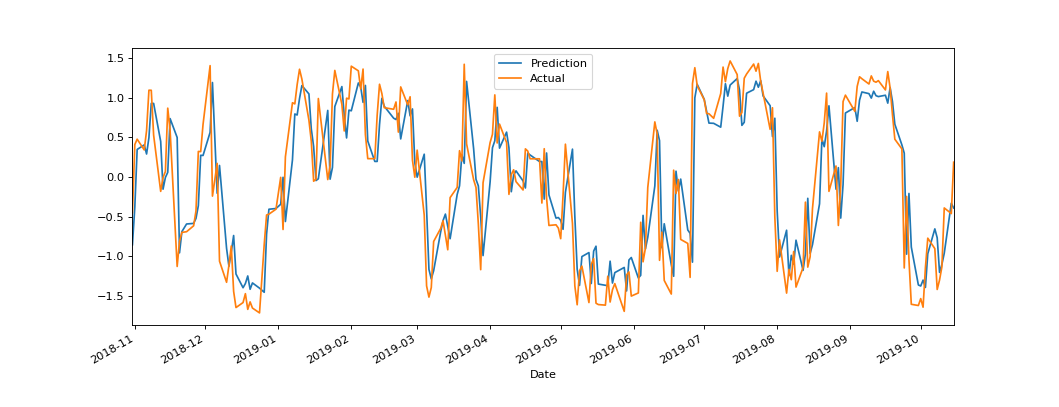

In [181]:
# Time series plot of actual and predicted data 
df1 = pd.DataFrame(predictions.reshape(-1,1), index= df.index[-len(predictions):], columns=["Prediction"])
df1['Actual']= y_test
_=df1.plot(figsize=(13,5))

Here we see with the increase of true value (independent variable), the prediciton vlaue also increases. So, there 
is a positive linear regression line between the variables.Now we can use R2 value to see how good the model is !
The Test score which is 0.718 and tells that how close the data points
are to the fitted regression line. we can say that 72% accuracy on predicting what StoK price would be shifted 
by 1 day. And finally we can say the model is fairly good !

### Combining both features (Stok and Stod)

In [87]:
# using both features    
for train_index, test_index in tscv.split(X1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [88]:
model_both_features = lm.fit(X1_train, y_train.reshape(len(y_train)))

C:\Users\L1308\.conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [89]:
predictions_both_features= lm.predict(X1_test)

In [90]:
lm.coef_

array([ 0.89935656, -0.05574563])

In [91]:
lm.intercept_

0.0006927942833137527

In [92]:
# predicting the score 
print('Train Score:', lm.score(X1_train, y_train))
print('Test Score:', lm.score(X1_test, y_test))

Train Score: 0.7227747729790465
Test Score: 0.7173993076398653


Here we see that the r2 value did not change when we use two independent variables together (Stok and StoD) 
instead of one independent variable (StoK only)

In [ ]:
### Creating features / predictor variables (Type II)
I created more features of Type II category of features from the paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4873195/
- BIAS6
- ASY5

In [95]:
# calculating BIAS6 : (Ct-MA6/MA6)*100
CurrentClose = df['Close']
MA6 = df['Close'].rolling(6).mean()

df['BIAS6']= ((CurrentClose - MA6)/MA6)*100


In [96]:
# calculating ASY5
#SYt =(ln Ct − ln Ct−1) × 100
# ASY5 = sum(SYt)/5
SY =(np.log(df['Close'])-np.log(df['Close'].shift(-1)))*100
ASY5 = SY.rolling(5).sum()/5

df['ASY5']= ASY5

In [99]:
df[:8]

,Open,High,Low,Close,Adj Close,Volume,StoK,StoD,label,BIAS6,ASY5
Date,,,,,,,,,,,
2013-12-31,21.41,21.93,21.38,21.75,21.75,25122400,NaN,NaN,NaN,NaN,NaN
2014-01-02,21.68,21.79,21.27,21.66,21.66,26413500,NaN,NaN,NaN,NaN,NaN
2014-01-03,21.20,21.43,20.90,20.97,20.97,34590200,NaN,NaN,NaN,NaN,NaN
2014-01-06,20.97,20.97,20.64,20.67,20.67,38180500,NaN,NaN,NaN,NaN,NaN
2014-01-07,20.89,21.94,20.89,21.73,21.73,67904500,NaN,NaN,NaN,NaN,-1.860174
2014-01-08,24.20,24.50,23.56,23.87,23.87,93499500,NaN,NaN,NaN,9.621125,-1.408154
2014-01-09,23.60,23.71,22.91,23.24,23.24,42782900,NaN,NaN,NaN,5.524444,-2.456081
2014-01-10,23.39,23.72,23.18,23.71,23.71,33930200,NaN,NaN,NaN,6.013861,-2.421134


### Model resuts using all features (Type I + Type II)

In [100]:
# First checking the model output using all the features (type1 + type2)
X2= np.array(df.dropna()[['StoK','StoD', 'BIAS6', 'ASY5']])

In [101]:
X2 = preprocessing.scale(X2)

In [102]:
# using all features (Type 1 and type2)   
for train_index, test_index in tscv.split(X2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [103]:
model_all_features = lm.fit(X2_train, y_train.reshape(len(y_train)))

C:\Users\L1308\.conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [104]:
predictions_all_features = lm.predict(X2_test)

In [105]:
lm.coef_

array([ 1.057387  , -0.23942018, -0.6318573 , -0.74474954])

In [106]:
lm.intercept_

0.0027493939509687405

In [107]:
# predicting the score 
print('Train Score:', lm.score(X2_train, y_train))
print('Test Score:', lm.score(X2_test, y_test))

Train Score: 0.8668244380460973
Test Score: 0.881990669299711


Here we see that the model is better when consider  all the features, as higher r2 value: 0.88 compared to the model based on one independent variable.

### Evaluate the model performance
I calculated three different performance parameter as follows:
- MAPE (mean absolute percentage error)
- sMAPE (Symmetric mean absolute percentage error)
- MASE (Mean absolute scaled error)

In [112]:
# calculating MAPE (mean absolute percentage error) for StoK variable
actual_StoK = pd.DataFrame(X_test)
predictions_StoK = pd.DataFrame(predictions)

MAPE = (abs(actual_StoK-predictions_StoK)/abs(actual_StoK)).sum()/len(actual_StoK)*100
MAPE

0    15.3395
dtype: float64

In [114]:
# calculating sMAPE (symmetric MAPE)
sMAPE=100/len(actual_StoK)*np.sum(2*np.abs(predictions_StoK-actual_StoK)/(np.abs(actual_StoK)+np.abs(predictions_StoK)))
sMAPE

0    16.630546
dtype: float64

In [165]:
# Calculating MASE (Mean absolute scaled error)
forescast_error = abs(X_test-predictions)
a= X_test
a2 =X_test[0]
diff = abs(a2-a).sum()/len(a)

MASE = (forescast_error/diff).mean()
MASE

0.9257241335370973

### Decision of when to sell or invest

In [168]:
y_test.shape, predictions.shape

((240, 1), (240,))

In [215]:
a=y_test
a= pd.DataFrame(y_test)
b=predictions
b= pd.DataFrame(predictions)
a = a.rolling(100).mean()
b = b.rolling(100).mean()

<IPython.core.display.Javascript object>


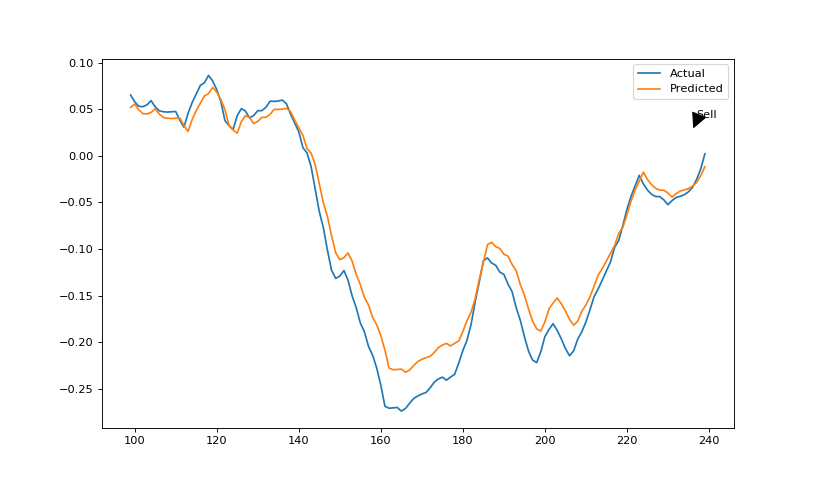

In [216]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(a, label='Actual')
ax.plot(b, label = 'Predicted')
ax.annotate('Sell', xy=(236.24,0.03),xytext=(237, 0.04),arrowprops=dict(facecolor='black', shrink=0.05) )

ax.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


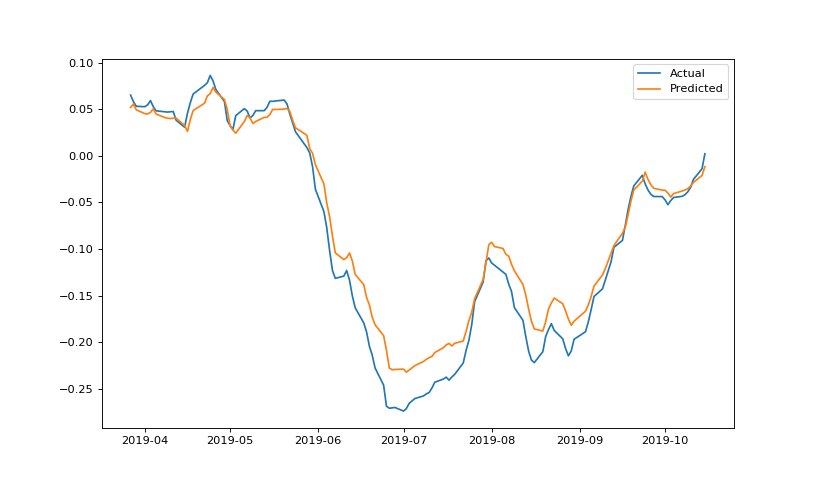

In [217]:
# Timeseries plot of when to sell and when to buy
 
%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df1.Actual.rolling(100).mean(), label='Actual')
ax.plot(df1.Prediction.rolling(100).mean(), label = 'Predicted')


ax.legend(loc='best')
plt.show()

Here from the graph (first graph) using 100 days moving average we can see the crossover line between the actual price and predicted price. The actual price is uptrend (blue line crossed the orange line),so we can forecast for holding the stock at this point (or selling from seller point of view).The second graph(time series plot) aslo suggest the same: we see that on 15Th Oct 2019(2019-10-15), the actual price is uptrend and above the preicted price, so we can decide to hold the stock or not to buy the stock.

### Calculating Hit Ratio
I calculated the Hit Ratio in order to measure the performace of prediction.

In [218]:
h = np.array(X_test)
h1= np.array(predictions)

h4=h[0]
h5=h1[0]



In [219]:
Hit_ratio = ((h4-h)*(h5-h1)).mean()
Hit_ratio

0.7747039515616152

From the hit ratio value we can say that the prediction performace of our model is fairly good.